#### CUSTOMER RELATIONSHIP MANAGEMENT(CRM)
 <a id = "1"></a>

#### Content:
1. [CUSTOMER RELATIONSHIP MANAGEMENT(CRM)](#1)
* [What is CRM?](#2)
* [What is the purpose?](#3)
* [Content of Dataset](#4)
* [Attribute Information](#5)

2. [Load Dataset](#6)
3. [Data Preprocessing](#7)
4. [RFM](#10)
* [What is RFM?](#11)
* [RFM Segments](#12)
5. [What is Customer Lifetime Value(CLV or CLTV)?](#13)
* [CLTV Calculated](#14)
6. [CLTV Predicted](#15)
* [What is a cohort model?](#16)
* [BG-NBD](#17)
* [Gamma Gamma](#18)
7. [And Finally CRM](#19)
8. [Final](#20)


<font color = '#EEEEEE'>

 <a id = "2"></a><br>
### What is CRM? 

Customer relationship management (CRM) is the combination of practices, strategies and technologies that companies use to manage and analyze customer interactions and data throughout the customer lifecycle.It tries to understand the customer profile of the company and to communicate according to these profiles. Moreover CRM targets to gain new customers other than existing customers

Analyzes on customers, finding audiences belonging to certain behaviors and organizing campaigns suitable for that audienceWith CRM software, the customer feels special, so dependency occurs for the company or product.In this study, we will create CRM by making RFM and then CLTV.

 <a id = "3"></a><br>
### What is the purpose?

In this notebook, we will create CRM by making RFM and then CLTV.

<a id = "4"></a><br>
### Content of Dataset

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

<a id = "5"></a><br>
### Attribute Information:

InvoiceNo: Invoice number. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product code.

Description: Product name.

Quantity: The quantities of each product per transaction.

InvoiceDate: Invoice date and time.The day and time when a transaction was generated.

UnitPrice: Unit price. Product price per unit in sterling.

CustomerID: Customer number.A 5-digit integral number uniquely assigned to each customer.

Country: Country name. The name of the country where a customer resides.





In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions



    
<font color = '#EEEEEE'>

<a id = "6"></a><br>
#  Load Dataset

In [3]:
df1 = pd.read_excel('online_retail_II.xlsx')
df1

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [4]:
df = df1.copy()

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
#Checking Variables

def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(525461, 8)
##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
##################### Tail #####################
       Invoice 

In [7]:
df.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Quantity,525461.0,10.337667,107.424110,-9600.00,-3.00,1.00,3.0,10.00,120.00,19152.00
Price,525461.0,4.688834,146.126914,-53594.36,0.21,1.25,2.1,4.21,19.95,25111.09
Customer ID,417534.0,15360.645478,1680.811316,12346.00,12435.00,13983.00,15311.0,16799.00,18196.00,18287.00


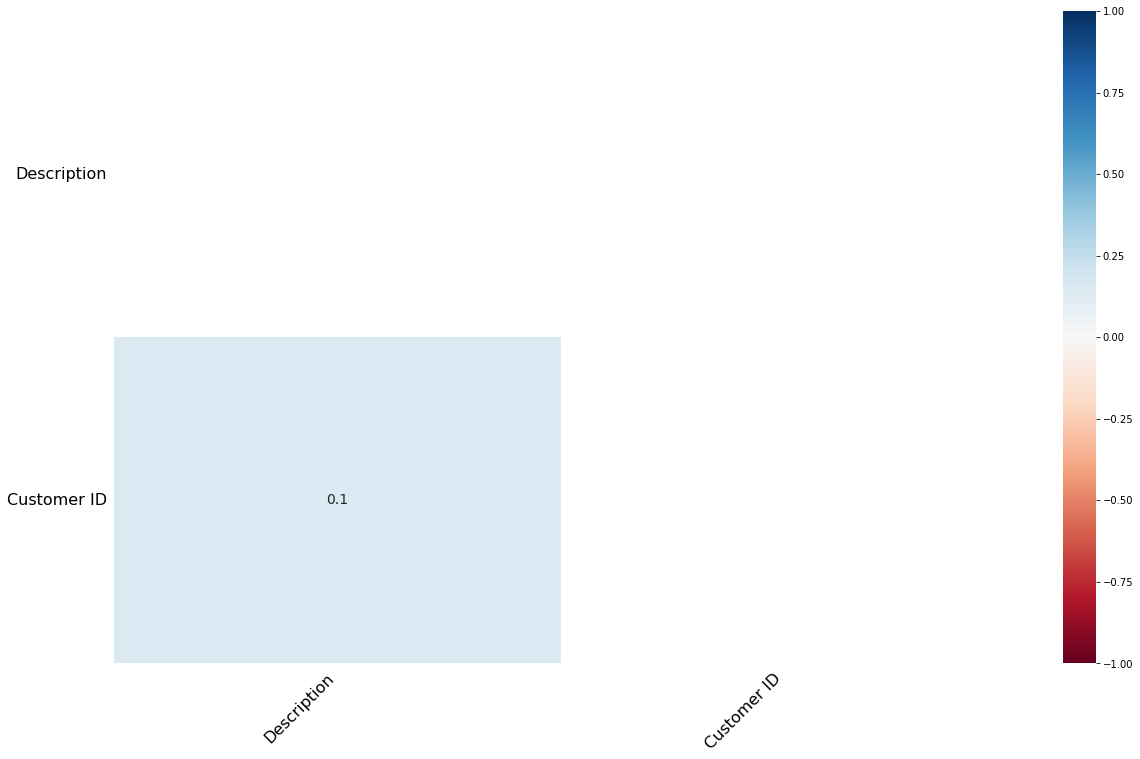

In [8]:
# there is no specific correlation between missing values


msno.heatmap(df);

c:\Users\Jason Chau\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

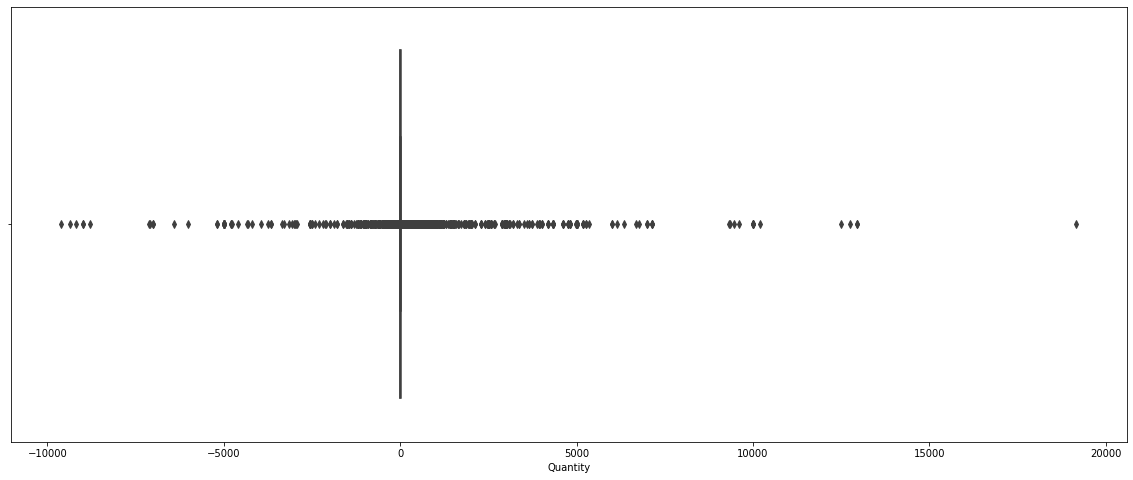

In [14]:
plt.figure(figsize=(20,8))
sns.boxplot(df['Quantity'])

c:\Users\Jason Chau\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


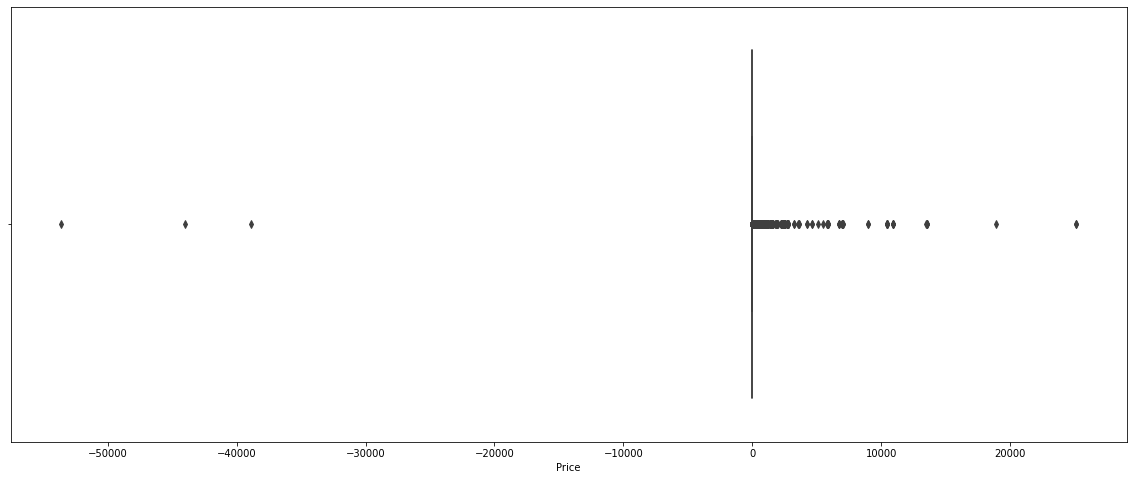

In [15]:
plt.figure(figsize=(20,8))
sns.boxplot(df["Price"])

<font color = '#EEEEEE'>

 <a id = "7"></a><br>
# Data Preprocessing

Outlier values are trimmed (very little) without damaging the data.Here we have set a lower and upper limit. But since the lower limit is set, we'll only assign it to the upper limit. We'll do it for Quantity and Price.

In [23]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [24]:
replace_with_thresholds(df,"Quantity")
replace_with_thresholds(df,"Price")

In [26]:
# outliers values are now cleaner.
df.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Quantity,525461.0,8.685688,60.954547,-9600.00,-3.00,1.00,3.0,10.00,120.00,304.50
Price,525461.0,3.264510,109.822785,-53594.36,0.21,1.25,2.1,4.21,19.95,49.56
Customer ID,417534.0,15360.645478,1680.811316,12346.00,12435.00,13983.00,15311.0,16799.00,18196.00,18287.00


In [27]:
def crm_data_prep(dataframe):
    dataframe.dropna(axis=0, inplace=True)
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["Price"]
    return dataframe


In [28]:
df=crm_data_prep(df)
check_df(df)

##################### Shape #####################
(407695, 9)
##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
TotalPrice            float64
dtype: object
##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   
1  489434    79323P                   PINK CHERRY LIGHTS      12.0   
2  489434    79323W                  WHITE CHERRY LIGHTS      12.0   

          InvoiceDate  Price  Customer ID         Country  TotalPrice  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom        83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom 

Variables are as follows after they are data cleaning

c:\Users\Jason Chau\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

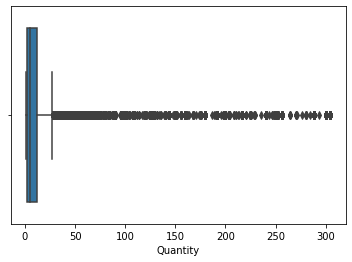

In [30]:
sns.boxplot(df["Quantity"])

c:\Users\Jason Chau\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


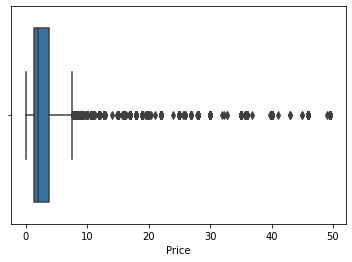

In [31]:
sns.boxplot(df["Price"]);

<a id = "10"></a><br>
# RFM

 <font color = '#EEEEEE'>


 Now, we are creating RFM.

  <a id = "11"></a><br>
 ### What is RFM?


RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

1. Recency: How recently has the customer made a transaction with us. 
2. Frequency: How frequent is the customer in ordering/buying some product from us
3. Monetary: How much does the customer spend on purchasing products from us.

For the below segmentation, we use reference from https://medium.com/analytics-vidhya/what-is-rfm-analysis-an-applied-example-in-python-1979b9853f0b


### RFM Grid

![](https://miro.medium.com/max/1234/0*JJBP4ToZiaw0HVPN.png) 

In [33]:
def create_rfm(dataframe):
    # RFM Metrics
    

    today_date = dt.datetime(2010, 12, 11)

    rfm = dataframe.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                                'Invoice': lambda num: num.nunique(),
                                                "TotalPrice": lambda price: price.sum()})

    rfm.columns = ['recency', 'frequency', "monetary"]

    rfm = rfm[(rfm['monetary'] > 0)]


    # RFM score
    rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
    rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])



    # segment naming
    rfm['rfm_segment'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)

    seg_map = {
        r'[1-2][1-2]': 'hibernating',
        r'[1-2][3-4]': 'at_risk',
        r'[1-2]5': 'cant_loose',
        r'3[1-2]': 'about_to_sleep',
        r'33': 'need_attention',
        r'[3-4][4-5]': 'loyal_customers',
        r'41': 'promising',
        r'51': 'new_customers',
        r'[4-5][2-3]': 'potential_loyalists',
        r'5[4-5]': 'champions'
    }

    rfm['rfm_segment'] = rfm['rfm_segment'].replace(seg_map, regex=True)
    rfm = rfm[["recency", "frequency", "monetary", "rfm_segment"]]
    return rfm

In [34]:
rfm = create_rfm(df)
rfm.head()

,recency,frequency,monetary,rfm_segment
Customer ID,,,,
12346.0,165,11,372.86,cant_loose
12347.0,3,2,1323.32,potential_loyalists
12348.0,74,1,222.16,hibernating
12349.0,43,3,2320.26,need_attention
12351.0,11,1,300.93,new_customers


<a id = "12"></a><br>
Then segments are created. 

**So why are we doing this?**

We look for answers to these questions;

- Who is our most profitable customer?
- What is it they appreciate in my products or services?
- Who are my new customers?
- How do I attract new customers to the company?

The answers to the questions are hidden in the segmentation.

With better RFM segmentation, we’ll be able to address certain segments in a personalized manner, based on their needs and preferences.

Browse the scheme to more easily understand segmentation.

<AxesSubplot:xlabel='rfm_segment', ylabel='frequency'>

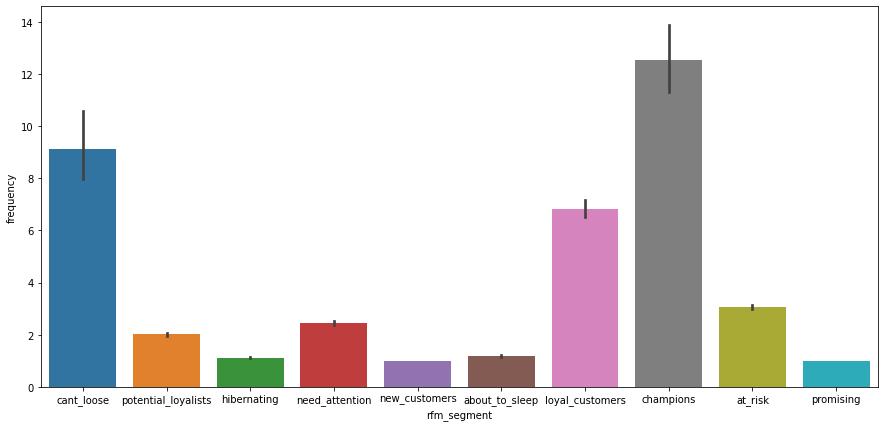

In [38]:
plt.figure(figsize=(15,7))
sns.barplot(x="rfm_segment", y="frequency", data=rfm)

<AxesSubplot:xlabel='rfm_segment', ylabel='Count'>

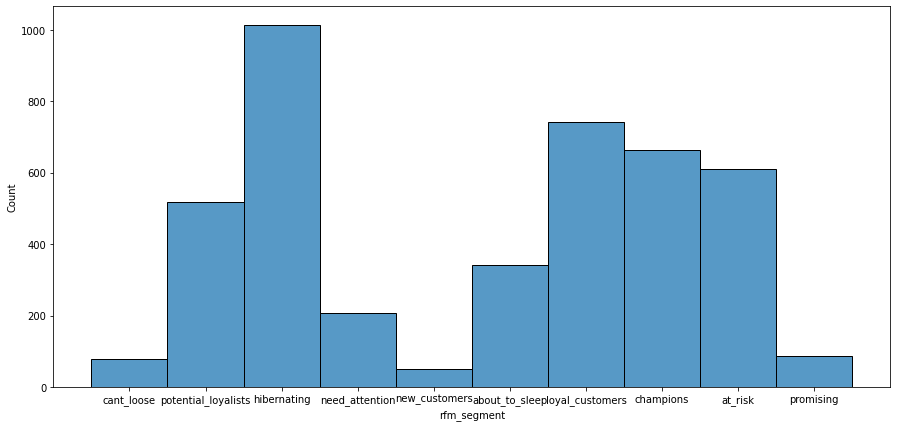

In [41]:
plt.figure(figsize=(15,7))
sns.histplot(x="rfm_segment", data=rfm)

In [42]:
check_df(rfm)

##################### Shape #####################
(4312, 4)
##################### Types #####################
recency          int64
frequency        int64
monetary       float64
rfm_segment     object
dtype: object
##################### Head #####################
             recency  frequency  monetary          rfm_segment
Customer ID                                                   
12346.0          165         11    372.86           cant_loose
12347.0            3          2   1323.32  potential_loyalists
12348.0           74          1    222.16          hibernating
##################### Tail #####################
             recency  frequency  monetary      rfm_segment
Customer ID                                               
18285.0          296          1    426.56      hibernating
18286.0          112          2   1295.99          at_risk
18287.0           18          4   2345.27  loyal_customers
##################### NA #####################
recency        0
frequency   

<font color = '#EEEEEE'>


<a id = "13"></a><br>

 #   What is Customer Lifetime Value(CLV or CLTV)?
    


<font color = '#EEEEEE'>



Customer lifetime value is how much money a customer will bring your brand throughout their entire time as a paying customer.It is the monetary value that a customer will give to a company during its relationship-communication with a company. 

In fact, it is to be able to extract the future situation from the current situation of the customer.


For this we will first make a simple calculation and then we will add the time factor.

<font color = '#EEEEEE'>
    
<a id = "14"></a><br>

### CLTV Calculated

<font color = '#EEEEEE'>

This time we divided people into A, B, C segments. (Not to be confused with rfm segmentation.) Let's remember we do life-time value calculations.

The calculations in the table have been made.

Standardization process was done for better understanding.

In [43]:
def create_cltv_calculated(dataframe):
    # avg_order_value
    dataframe['avg_order_value'] = dataframe['monetary'] / dataframe['frequency']

    # purchase_frequency
    dataframe["purchase_frequency"] = dataframe['frequency'] / dataframe.shape[0]

    # repeat rate & churn rate
    repeat_rate = dataframe[dataframe.frequency > 1].shape[0] / dataframe.shape[0]
    churn_rate = 1 - repeat_rate

    # profit_margin
    dataframe['profit_margin'] = dataframe['monetary'] * 0.05

    # Customer Value
    dataframe['cv'] = (dataframe['avg_order_value'] * dataframe["purchase_frequency"])

    # Customer Lifetime Value
    dataframe['cltv'] = (dataframe['cv'] / churn_rate) * dataframe['profit_margin']

    # minmaxscaler
    scaler = MinMaxScaler(feature_range=(1, 100))
    scaler.fit(dataframe[["cltv"]])
    dataframe["cltv_calculated"] = scaler.transform(dataframe[["cltv"]])

    dataframe["cltv_calculated_segment"] = pd.qcut(dataframe["cltv_calculated"], 3, labels=["C", "B", "A"])

    dataframe = dataframe[["recency", "frequency", "monetary", "rfm_segment",
                           "cltv_calculated", "cltv_calculated_segment"]]

    return dataframe

In [44]:
rfm_cltv = create_cltv_calculated(rfm)
check_df(rfm_cltv)

##################### Shape #####################
(4312, 6)
##################### Types #####################
recency                       int64
frequency                     int64
monetary                    float64
rfm_segment                  object
cltv_calculated             float64
cltv_calculated_segment    category
dtype: object
##################### Head #####################
             recency  frequency  monetary          rfm_segment  \
Customer ID                                                      
12346.0          165         11    372.86           cant_loose   
12347.0            3          2   1323.32  potential_loyalists   
12348.0           74          1    222.16          hibernating   

             cltv_calculated cltv_calculated_segment  
Customer ID                                           
12346.0             1.000150                       C  
12347.0             1.001888                       A  
12348.0             1.000053                       C  
#####

<AxesSubplot:xlabel='rfm_segment', ylabel='cltv_calculated'>

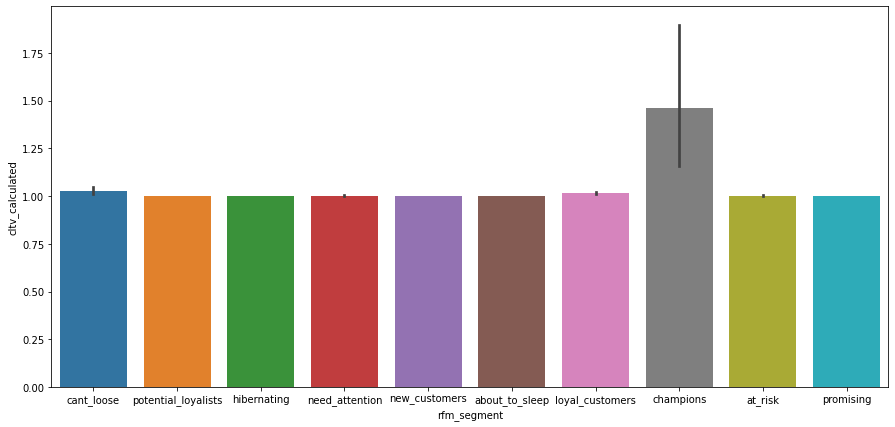

In [45]:
plt.figure(figsize=(15,7))
sns.barplot(x="rfm_segment", y="cltv_calculated", data=rfm_cltv)

In [46]:
rfm_cltv.head()

,recency,frequency,monetary,rfm_segment,cltv_calculated,cltv_calculated_segment
Customer ID,,,,,,
12346.0,165,11,372.86,cant_loose,1.000150,C
12347.0,3,2,1323.32,potential_loyalists,1.001888,A
12348.0,74,1,222.16,hibernating,1.000053,C
12349.0,43,3,2320.26,need_attention,1.005803,A
12351.0,11,1,300.93,new_customers,1.000098,C


<AxesSubplot:xlabel='cltv_calculated', ylabel='cltv_calculated_segment'>

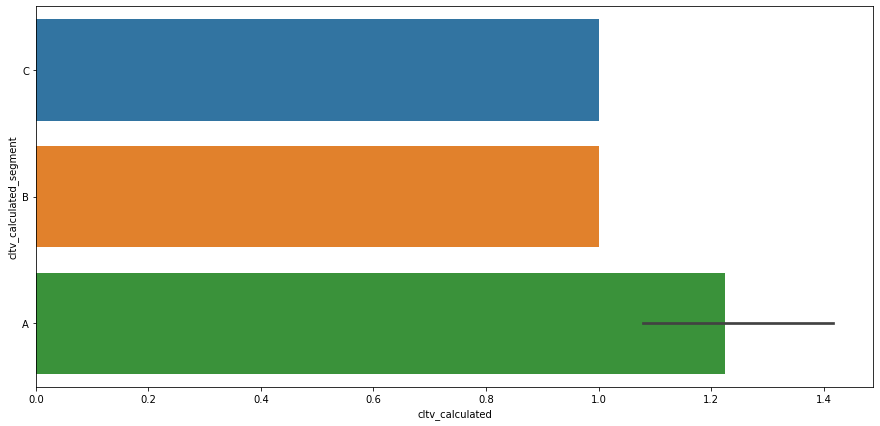

In [47]:
plt.figure(figsize=(15,7))
sns.barplot(x="cltv_calculated", y="cltv_calculated_segment", data=rfm_cltv)

<font color = '#EEEEEE'>
    
<a id = "15"></a><br>

### CLTV Preticted

<a id = "16"></a><br>
 What is a cohort model?

Instead of simply assuming all the customers to be one group, we can try to split them into multiple groups and calculate the CLTV for each group. 

 **Note**: recency value customized. (One of the key differences between RFM and CLTV)

<a id = "17"></a><br>
### BG-NBD


In short, expected sales value. Used to estimate how many purchases customers can make over a period of time

This method computes the probability that a customer with history (frequency, recency_weekly, T_weekly) is currently alive.(relationship between recency & frequency)

<a id = "18"></a><br>
### Gamma Gamma

-conditional expected number of purchases up to time-

**Note1**: There should be no correlation between the **frequency of transactions** and **their monetary value.**

**Note2:** We are considering only customers who made repeat purchases with the business i.e., frequency > 0. Because, if the frequency is 0, it means that they are a one-time customer and are considered already dead.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


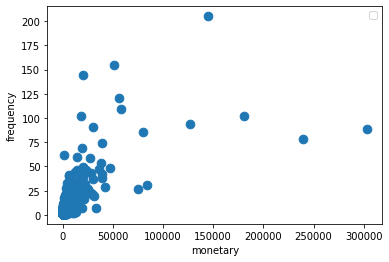

In [48]:
# The correlation seems very weak. 

plt.scatter(rfm_cltv.monetary,rfm_cltv.frequency,s=75)


plt.xlabel("monetary")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [54]:
def create_cltv_predicted(dataframe):
    today_date = dt.datetime(2010, 12, 11)

    ## recency value customized
    rfm = dataframe.groupby('Customer ID').agg({'InvoiceDate': [lambda date: (date.max()-date.min()).days,
                                                                lambda date: (today_date - date.min()).days],
                                                'Invoice': lambda num: num.nunique(),
                                                'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

    rfm.columns = rfm.columns.droplevel(0)

    ## recency_cltv_predicted
    rfm.columns = ['recency_cltv_predicted', 'T', 'frequency', 'monetary']

    ## basic monetary_avg
    rfm["monetary"] = rfm["monetary"] / rfm["frequency"]

    rfm.rename(columns={"monetary": "monetary_avg"}, inplace=True)


  
    ## recency_weekly_cltv_predicted
    rfm["recency_weekly_cltv_predicted"] = rfm["recency_cltv_predicted"] / 7
    rfm["T_weekly"] = rfm["T"] / 7



    # CONTROL
    rfm = rfm[rfm["monetary_avg"] > 0]

    ## recency filter
    rfm = rfm[(rfm['frequency'] > 1)]

    rfm["frequency"] = rfm["frequency"].astype(int)

    # BGNBD
    bgf = BetaGeoFitter(penalizer_coef=0.01)
    bgf.fit(rfm['frequency'],
            rfm['recency_weekly_cltv_predicted'],
            rfm['T_weekly'])


    # Gamma Gamma
    ggf = GammaGammaFitter(penalizer_coef=0.01)
    ggf.fit(rfm['frequency'], rfm['monetary_avg'])
    rfm["expected_average_profit"] = ggf.conditional_expected_average_profit(rfm['frequency'],
                                                                             rfm['monetary_avg'])
    # 6 months cltv_p
    cltv = ggf.customer_lifetime_value(bgf,
                                       rfm['frequency'],
                                       rfm['recency_weekly_cltv_predicted'],
                                       rfm['T_weekly'],
                                       rfm['monetary_avg'],
                                       time=6,
                                       freq="W",
                                       discount_rate=0.01)

    rfm["cltv_predicted"] = cltv

    # minmaxscaler
    scaler = MinMaxScaler(feature_range=(1, 100))
    scaler.fit(rfm[["cltv_predicted"]])
    rfm["cltv_predicted"] = scaler.transform(rfm[["cltv_predicted"]])

    # rfm.fillna(0, inplace=True)

    # cltv_predicted_segment
    rfm["cltv_predicted_segment"] = pd.qcut(rfm["cltv_predicted"], 3, labels=["C", "B", "A"])

    ## recency_cltv_predicted, recency_weekly_cltv_predicted
    rfm = rfm[["recency_cltv_predicted", "T", "monetary_avg", "recency_weekly_cltv_predicted", "T_weekly",
               "expected_average_profit","cltv_predicted", "cltv_predicted_segment"]]


    return rfm

In [55]:
rfm_cltv_predicted = create_cltv_predicted(df)
check_df(rfm_cltv_predicted)

##################### Shape #####################
(2893, 8)
##################### Types #####################
recency_cltv_predicted              int64
T                                   int64
monetary_avg                      float64
recency_weekly_cltv_predicted     float64
T_weekly                          float64
expected_average_profit           float64
cltv_predicted                    float64
cltv_predicted_segment           category
dtype: object
##################### Head #####################
             recency_cltv_predicted    T  monetary_avg  \
Customer ID                                              
12346.0                         196  361     33.896364   
12347.0                          37   40    661.660000   
12349.0                         181  225    773.420000   

             recency_weekly_cltv_predicted   T_weekly  \
Customer ID                                             
12346.0                          28.000000  51.571429   
12347.0                      

In [56]:
rfm_cltv_predicted.head()

,recency_cltv_predicted,T,monetary_avg,recency_weekly_cltv_predicted,T_weekly,expected_average_profit,cltv_predicted,cltv_predicted_segment
Customer ID,,,,,,,,
12346.0,196,361,33.896364,28.000000,51.571429,34.785293,1.032671,C
12347.0,37,40,661.660000,5.285714,5.714286,726.711783,4.445715,A
12349.0,181,225,773.420000,25.857143,32.142857,822.330524,2.793966,A
12352.0,16,28,171.900000,2.285714,4.000000,190.312089,1.998767,B
12356.0,44,60,1187.416667,6.285714,8.571429,1261.801731,7.350573,A


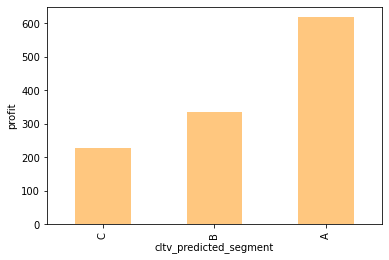

In [57]:
rfm_cltv_predicted.groupby('cltv_predicted_segment').agg('expected_average_profit').mean().plot(kind='bar', colormap='copper_r');

plt.ylabel("profit");



<font color = '#EEEEEE'>
    
<a id = "19"></a><br>
    
# And Finally...CRM!

In [58]:
crm_final = rfm_cltv.merge(rfm_cltv_predicted, on="Customer ID", how="left")
check_df(crm_final)

##################### Shape #####################
(4312, 14)
##################### Types #####################
recency                             int64
frequency                           int64
monetary                          float64
rfm_segment                        object
cltv_calculated                   float64
cltv_calculated_segment          category
recency_cltv_predicted            float64
T                                 float64
monetary_avg                      float64
recency_weekly_cltv_predicted     float64
T_weekly                          float64
expected_average_profit           float64
cltv_predicted                    float64
cltv_predicted_segment           category
dtype: object
##################### Head #####################
             recency  frequency  monetary          rfm_segment  \
Customer ID                                                      
12346.0          165         11    372.86           cant_loose   
12347.0            3          2   1323.3

In [59]:
# will be effective in campaign decisions

crm_final.sort_values(by="monetary_avg", ascending=False).head()

,recency,frequency,monetary,rfm_segment,cltv_calculated,cltv_calculated_segment,recency_cltv_predicted,T,monetary_avg,recency_weekly_cltv_predicted,T_weekly,expected_average_profit,cltv_predicted,cltv_predicted_segment
Customer ID,,,,,,,,,,,,,,
12357.0,24,2,11279.55,potential_loyalists,1.137135,A,0.0,24.0,5639.775000,0.000000,3.428571,6178.891147,33.204317,A
17450.0,3,7,33132.20,champions,2.183222,A,70.0,74.0,4733.171429,10.000000,10.571429,4854.298121,42.870766,A
14091.0,290,2,9110.85,hibernating,1.089471,A,44.0,334.0,4555.425000,6.285714,47.714286,4991.278829,2.187712,A
14088.0,42,3,13544.99,need_attention,1.197753,A,14.0,57.0,4514.996667,2.000000,8.142857,4794.138374,22.742626,A
18102.0,1,89,303064.29,champions,100.000000,A,373.0,374.0,3405.216742,53.285714,53.428571,3411.925276,100.000000,A


In [60]:
# will be effective in campaign decisions

crm_final.sort_values(by="monetary_avg", ascending=False)

,recency,frequency,monetary,rfm_segment,cltv_calculated,cltv_calculated_segment,recency_cltv_predicted,T,monetary_avg,recency_weekly_cltv_predicted,T_weekly,expected_average_profit,cltv_predicted,cltv_predicted_segment
Customer ID,,,,,,,,,,,,,,
12357.0,24,2,11279.55,potential_loyalists,1.137135,A,0.0,24.0,5639.775000,0.000000,3.428571,6178.891147,33.204317,A
17450.0,3,7,33132.20,champions,2.183222,A,70.0,74.0,4733.171429,10.000000,10.571429,4854.298121,42.870766,A
14091.0,290,2,9110.85,hibernating,1.089471,A,44.0,334.0,4555.425000,6.285714,47.714286,4991.278829,2.187712,A
14088.0,42,3,13544.99,need_attention,1.197753,A,14.0,57.0,4514.996667,2.000000,8.142857,4794.138374,22.742626,A
18102.0,1,89,303064.29,champions,100.000000,A,373.0,374.0,3405.216742,53.285714,53.428571,3411.925276,100.000000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18279.0,155,1,231.34,hibernating,1.000058,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18280.0,30,1,307.55,potential_loyalists,1.000102,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,213,1,120.32,hibernating,1.000016,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color = '#EEEEEE'>
    
<a id = "20"></a><br>

# FINAL

So we can analyze each metric comparatively.

We can make different decisions for customers in different segments.

We can make different campaigns according to the decisions taken.

After that, the productivity of the campaign can be measured by making different offers to the masses.

A/B test can be used for this.